['#abdda4', '#9e0142', '#d53e4f', '#9e0142', '#9e0142', '#9e0142', '#9e0142', '#f46d43', '#f46d43', '#9e0142', '#9e0142', '#fee08b', '#fee08b', '#fee08b', '#66c2a5', '#f46d43', '#66c2a5', '#f46d43', '#f46d43', '#f46d43', '#f46d43', '#9e0142', '#f46d43', '#ffffbf', '#f46d43', '#f46d43', '#f46d43', '#e6f598', '#e6f598', '#e6f598', '#9e0142', '#9e0142', '#f46d43', '#d53e4f', '#9e0142', '#9e0142', '#ffffbf', '#fdae61', '#5e4fa2', '#d53e4f', '#d53e4f', '#9e0142', '#3288bd', '#9e0142', '#fdae61', '#3288bd', '#9e0142', '#9e0142', '#9e0142', '#d53e4f', '#9e0142', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#d53e4f', '#abdda4', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#d53e4f', '#ffffbf', '#d53e4f', '#d53e4f', '#fdae61', '#d53e4f', '#9e0142', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#9e0142', '#d53e4f', '#9e0142']
0.3
1.3
['#FF6347', '#4682B4']
['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', '#e6f598', '#abdda4', '#66c2a5', '#3288bd',

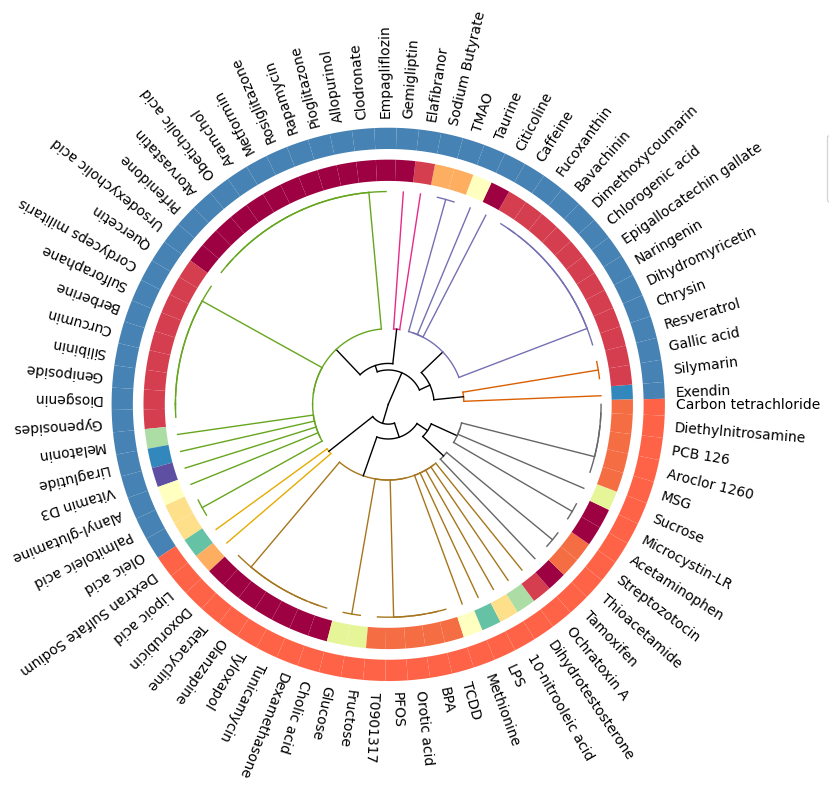

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
import radialtree as rt  # Assuming radialtree is the correct package for your radialTreee function

def plot_circular_dendrogram(df, class_col='CLASS', pathway_col='PATHWAY', source_col='SOURCE', chemical_col='CHEMICAL_NAME'):
    # Encode the CLASS, PATHWAY, and Source columns for clustering
    df_encoded = pd.get_dummies(df[[class_col, pathway_col, source_col]])
    Y = sch.linkage(df_encoded, method="average")
    Z2 = sch.dendrogram(
        Y,
        labels=df[chemical_col].values,
        no_plot=True,
    )

    # Prepare the figure
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_aspect(1)

    # Define specific colors for each class and source
    class_colors = {
        'Inducer'  : '#FF6347',  # Tomato red
        'Inhibitor': '#4682B4',  # Steel blue
    }
    source_colors = {
        'Drugs' : '#9e0142',
        'Natural products' : '#d53e4f',
        'Chemicals' : '#f46d43',
        'Metabolites' : '#fdae61',
        'Fatty acids' : '#fee08b',
        'Amino acids' : '#ffffbf',
        'Sugars' : '#e6f598',
        'Hormones' : '#abdda4',
        'Polysaccharides' : '#66c2a5',
        'Peptides' : '#3288bd',
        'Vitamins' : '#5e4fa2'
    }
    colors_legends= {"Classes": {"colors": ['#FF6347','#4682B4'], "labels": ['Inducer', 'Inhibitor']},
                     "Source": {"colors": list(source_colors.values()), "labels": list(source_colors.keys())}}
    # Create color arrays for leaves
    leaf_colors = [class_colors.get(cls, '#FFFF00') for cls in df[class_col]]
    leaf_source_colors = [source_colors.get(src, '#FFFF00') for src in df[source_col]]
    print(leaf_source_colors)
    # Plot the radial tree
    rt.radialTreee(Z2, ax=ax, pallete="Dark2", fontsize=10, colorlabels={"Classes": leaf_colors, "Source": leaf_source_colors}, colorlabels_legend=colors_legends)
    for line in ax.lines:
        line.set_linewidth(1)  # Adjust the line width
    plt.tight_layout()
    plt.savefig("dendrogram.png", dpi=500)
    plt.show()

# Example usage
df = pd.read_csv("dataset_checked_smile.csv")  # Load your data here
plot_circular_dendrogram(df)


pip list --format=freeze > requirements.txt